This is my first modeling notebook. It includes:

- first attempt to model based on 32 teams lots of features (model gave back the mean)
- switching gears to 3-year looks to give 96 training datapoints, 32 test datapoints
- First real model based on a small subset of features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('./model_data.csv',index_col='Tm')

In [24]:
df.head()

,2PA_scoring_2010,2PA_scoring_2011,2PA_scoring_2012,2PA_scoring_2013,2PA_scoring_2014,2PA_scoring_2015,2PA_scoring_2016,2PA_scoring_def_2010,2PA_scoring_def_2011,2PA_scoring_def_2012,...,Yds_rush_def_2014,Yds_rush_def_2015,Yds_rush_def_2016,Yds_rushing_2010,Yds_rushing_2011,Yds_rushing_2012,Yds_rushing_2013,Yds_rushing_2014,Yds_rushing_2015,Yds_rushing_2016
Tm,,,,,,,,,,,,,,,,,,,,,
Jacksonville Jaguars,0.0,1.0,7.0,2.0,4.0,5.0,2.0,2.0,1.0,1.0,...,2033.0,1709.0,1703.0,2395.0,1970.0,1369.0,1260.0,1633.0,1473.0,1631.0
Houston Texans,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,5.0,0.0,...,1681.0,1597.0,1595.0,2042.0,2448.0,2123.0,1743.0,2161.0,1731.0,1859.0
Tampa Bay Buccaneers,3.0,7.0,4.0,0.0,0.0,3.0,7.0,3.0,1.0,3.0,...,1819.0,1606.0,1875.0,2001.0,1458.0,1837.0,1612.0,1375.0,2162.0,1616.0
New York Jets,1.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,...,1489.0,1335.0,1581.0,2374.0,1692.0,1896.0,2158.0,2280.0,1868.0,1802.0
New York Giants,1.0,4.0,1.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,...,2162.0,1942.0,1417.0,2200.0,1427.0,1862.0,1332.0,1603.0,1609.0,1412.0


In [39]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.preprocessing import StandardScaler


In [25]:
Xtrain = df[[i for i in df.columns if ('_2010' in i)|('_2011' in i)|('_2012' in i)]]
ytrain = df[[i for i in df.columns if 'W_' in i]]['W_standings_2013']
Xtest = df[[i for i in df.columns if ('_2011' in i)|('_2012' in i)|('_2013' in i)]]
ytest = df[[i for i in df.columns if 'W_' in i]]['W_standings_2014']

In [44]:
Xtrain.shape

(32, 216)

In [14]:
ss = StandardScaler()

In [15]:
Xstd = ss.fit_transform(Xtrain)

In [7]:
lr = LinearRegression()

In [8]:
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])

In [16]:
enet.fit(Xstd,ytrain)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [49]:
enet.alpha_

11.04058563890521

In [48]:
enet.l1_ratio_

0.10000000000000001

In [45]:
Xtest_std = ss.transform(Xtest)

In [46]:
enet.score(Xtest_std,ytest)

0.0

In [47]:
enet.predict(Xtest_std)

array([ 7.96875,  7.96875,  7.96875,  7.96875,  7.96875,  7.96875,
        7.96875,  7.96875,  7.96875,  7.96875,  7.96875,  7.96875,
        7.96875,  7.96875,  7.96875,  7.96875,  7.96875,  7.96875,
        7.96875,  7.96875,  7.96875,  7.96875,  7.96875,  7.96875,
        7.96875,  7.96875,  7.96875,  7.96875,  7.96875,  7.96875,
        7.96875,  7.96875])

In [52]:
[i for i in df.columns if '2010' in i]

['2PA_scoring_2010',
 '2PA_scoring_def_2010',
 '2PM_scoring_2010',
 '2PM_scoring_def_2010',
 '4QC_passing_2010',
 'ANY/A_pass_def_2010',
 'ANY/A_passing_2010',
 'AY/A_pass_def_2010',
 'AY/A_passing_2010',
 'AllTD_scoring_2010',
 'AllTD_scoring_def_2010',
 'Att_pass_def_2010',
 'Att_passing_2010',
 'Att_rush_def_2010',
 'Att_rushing_2010',
 'Cmp_pass_def_2010',
 'Cmp_passing_2010',
 'DSRS_standings_2010',
 'FGA_scoring_2010',
 'FGA_scoring_def_2010',
 'FGM_scoring_2010',
 'FGM_scoring_def_2010',
 'FblTD_scoring_2010',
 'FblTD_scoring_def_2010',
 'Fmb_rushing_2010',
 'GWD_passing_2010',
 'IntTD_scoring_2010',
 'IntTD_scoring_def_2010',
 'Int_pass_def_2010',
 'Int_passing_2010',
 'KR TD_scoring_2010',
 'KR TD_scoring_def_2010',
 'MoV_standings_2010',
 'NY/A_pass_def_2010',
 'NY/A_passing_2010',
 'OSRS_standings_2010',
 'OthTD_scoring_2010',
 'OthTD_scoring_def_2010',
 'PA_standings_2010',
 'PD_standings_2010',
 'PR TD_scoring_2010',
 'PR TD_scoring_def_2010',
 'Pts_scoring_2010',
 'Rate_p

In [58]:
cols = ['PA_standings_','W_standings','Pts_scoring_','SoS_standings_','ANY/A_pass_def_','ANY/A_passing_','Y/A_rush_def_','Y/A_rushing_','FGM_scoring_']



In [62]:
cols_year = []
for i in cols:
    for col in df.columns:
        if i in col:
            cols_year.append(col)

In [91]:
df_new = df[cols_year]

In [92]:
df_2010_2012 = df_new[[i for i in df_new.columns if ('2010' in i) | ('2011' in i)|('2012' in i)]]

df_2010_2012 = df_2010_2012.join(df_new['W_standings_2013'])

df_2010_2012.index = [i + ' (2010-2012)' for i in df_2010_2012.index]

df_2010_2012.columns = df_2010_2012.columns.map(lambda x: x.replace('2010','py_2').replace('2011','py_1').replace('2012','py').replace('2013','next'))

In [102]:
df_2010_2012.head()

,PA_standings_py_2,PA_standings_py_1,PA_standings_py,W_standings_py_2,W_standings_py_1,W_standings_py,Pts_scoring_py_2,Pts_scoring_py_1,Pts_scoring_py,SoS_standings_py_2,...,Y/A_rushing_py_2,Y/A_rushing_py_1,Y/A_rushing_py,FGM_scoring_py_2,FGM_scoring_py_1,FGM_scoring_py,FGM_scoring_def_py_2,FGM_scoring_def_py_1,FGM_scoring_def_py,W_standings_next
Jacksonville Jaguars (2010-2012),419.0,329.0,444.0,8.0,5.0,2.0,353.0,243.0,255.0,-0.4,...,4.7,4.0,3.8,22.0,23.0,25.0,23.0,22.0,36.0,4.0
Houston Texans (2010-2012),427.0,278.0,331.0,6.0,10.0,12.0,390.0,381.0,416.0,0.5,...,4.8,4.5,4.2,27.0,32.0,31.0,21.0,30.0,21.0,2.0
Tampa Bay Buccaneers (2010-2012),318.0,494.0,394.0,10.0,4.0,7.0,341.0,287.0,389.0,-2.0,...,4.6,4.2,4.4,23.0,26.0,28.0,17.0,23.0,19.0,4.0
New York Jets (2010-2012),304.0,363.0,375.0,11.0,8.0,6.0,367.0,377.0,281.0,2.5,...,4.4,3.8,3.8,30.0,19.0,21.0,18.0,29.0,22.0,8.0
New York Giants (2010-2012),347.0,400.0,344.0,10.0,9.0,9.0,394.0,394.0,429.0,-0.8,...,4.6,3.5,4.6,19.0,19.0,33.0,23.0,25.0,26.0,7.0


In [103]:
df_2011_2013 = df_new[[i for i in df_new.columns if ('2011' in i) | ('2012' in i)|('2013' in i)]]

df_2011_2013 = df_2011_2013.join(df_new['W_standings_2014'])

df_2011_2013.index = [i + ' (2011-2013)' for i in df_2011_2013.index]

df_2011_2013.columns = df_2011_2013.columns.map(lambda x: x.replace('2011','py_2').replace('2012','py_1').replace('2013','py').replace('2014','next'))

In [108]:
df_2011_2013.head()

,PA_standings_py_2,PA_standings_py_1,PA_standings_py,W_standings_py_2,W_standings_py_1,W_standings_py,Pts_scoring_py_2,Pts_scoring_py_1,Pts_scoring_py,SoS_standings_py_2,...,Y/A_rushing_py_2,Y/A_rushing_py_1,Y/A_rushing_py,FGM_scoring_py_2,FGM_scoring_py_1,FGM_scoring_py,FGM_scoring_def_py_2,FGM_scoring_def_py_1,FGM_scoring_def_py,W_standings_next
Jacksonville Jaguars (2011-2013),329.0,444.0,449.0,5.0,2.0,4.0,243.0,255.0,247.0,-0.3,...,4.0,3.8,3.3,23.0,25.0,23.0,22.0,36.0,26.0,3.0
Houston Texans (2011-2013),278.0,331.0,428.0,10.0,12.0,2.0,381.0,416.0,276.0,-1.9,...,4.5,4.2,4.2,32.0,31.0,26.0,30.0,21.0,30.0,9.0
Tampa Bay Buccaneers (2011-2013),494.0,394.0,389.0,4.0,7.0,4.0,287.0,389.0,288.0,2.3,...,4.2,4.4,3.8,26.0,28.0,23.0,23.0,19.0,31.0,2.0
New York Jets (2011-2013),363.0,375.0,387.0,8.0,6.0,8.0,377.0,281.0,290.0,0.0,...,3.8,3.8,4.4,19.0,21.0,33.0,29.0,22.0,33.0,4.0
New York Giants (2011-2013),400.0,344.0,383.0,9.0,9.0,7.0,394.0,429.0,294.0,2.0,...,3.5,4.6,3.5,19.0,33.0,23.0,25.0,26.0,29.0,6.0


In [109]:
df_2012_2014 = df_new[[i for i in df_new.columns if ('2012' in i) | ('2013' in i)|('2014' in i)]]

df_2012_2014 = df_2012_2014.join(df_new['W_standings_2015'])

df_2012_2014.index = [i + ' (2012-2014)' for i in df_2012_2014.index]

df_2012_2014.columns = df_2012_2014.columns.map(lambda x: x.replace('2012','py_2').replace('2013','py_1').replace('2014','py').replace('2015','next'))

In [113]:
df_2012_2014.head()

,PA_standings_py_2,PA_standings_py_1,PA_standings_py,W_standings_py_2,W_standings_py_1,W_standings_py,Pts_scoring_py_2,Pts_scoring_py_1,Pts_scoring_py,SoS_standings_py_2,...,Y/A_rushing_py_2,Y/A_rushing_py_1,Y/A_rushing_py,FGM_scoring_py_2,FGM_scoring_py_1,FGM_scoring_py,FGM_scoring_def_py_2,FGM_scoring_def_py_1,FGM_scoring_def_py,W_standings_next
Jacksonville Jaguars (2012-2014),444.0,449.0,412.0,2.0,4.0,3.0,255.0,247.0,249.0,-1.1,...,3.8,3.3,4.5,25.0,23.0,20.0,36.0,26.0,31.0,5.0
Houston Texans (2012-2014),331.0,428.0,307.0,12.0,2.0,9.0,416.0,276.0,372.0,-1.8,...,4.2,4.2,3.9,31.0,26.0,30.0,21.0,30.0,19.0,9.0
Tampa Bay Buccaneers (2012-2014),394.0,389.0,410.0,7.0,4.0,2.0,389.0,288.0,277.0,0.3,...,4.4,3.8,3.9,28.0,23.0,20.0,19.0,31.0,29.0,6.0
New York Jets (2012-2014),375.0,387.0,401.0,6.0,8.0,4.0,281.0,290.0,283.0,0.0,...,3.8,4.4,4.5,21.0,33.0,32.0,22.0,33.0,26.0,10.0
New York Giants (2012-2014),344.0,383.0,400.0,9.0,7.0,6.0,429.0,294.0,380.0,0.9,...,4.6,3.5,3.6,33.0,23.0,24.0,26.0,29.0,29.0,6.0


In [117]:
#build three year looks 2013-2015

df_2013_2015 = df_new[[i for i in df_new.columns if ('2013' in i) | ('2014' in i)|('2015' in i)]]

df_2013_2015 = df_2013_2015.join(df_new['W_standings_2016'])

df_2013_2015.index = [i + ' (2013-2015)' for i in df_2013_2015.index]

df_2013_2015.columns = df_2013_2015.columns.map(lambda x: x.replace('2013','py_2').replace('2014','py_1').replace('2015','py').replace('2016','next'))

In [118]:
df_2013_2015.head()

,PA_standings_py_2,PA_standings_py_1,PA_standings_py,W_standings_py_2,W_standings_py_1,W_standings_py,Pts_scoring_py_2,Pts_scoring_py_1,Pts_scoring_py,SoS_standings_py_2,...,Y/A_rushing_py_2,Y/A_rushing_py_1,Y/A_rushing_py,FGM_scoring_py_2,FGM_scoring_py_1,FGM_scoring_py,FGM_scoring_def_py_2,FGM_scoring_def_py_1,FGM_scoring_def_py,W_standings_next
Jacksonville Jaguars (2013-2015),449.0,412.0,448.0,4.0,3.0,5.0,247.0,249.0,376.0,1.5,...,3.3,4.5,4.2,23.0,20.0,26.0,26.0,31.0,30.0,3.0
Houston Texans (2013-2015),428.0,307.0,313.0,2.0,9.0,9.0,276.0,372.0,339.0,1.9,...,4.2,3.9,3.7,26.0,30.0,23.0,30.0,19.0,20.0,9.0
Tampa Bay Buccaneers (2013-2015),389.0,410.0,417.0,4.0,2.0,6.0,288.0,277.0,342.0,3.6,...,3.8,3.9,4.8,23.0,20.0,29.0,31.0,29.0,31.0,9.0
New York Jets (2013-2015),387.0,401.0,314.0,8.0,4.0,10.0,290.0,283.0,387.0,0.0,...,4.4,4.5,4.2,33.0,32.0,27.0,33.0,26.0,26.0,5.0
New York Giants (2013-2015),383.0,400.0,442.0,7.0,6.0,6.0,294.0,380.0,420.0,0.2,...,3.5,3.6,4.0,23.0,24.0,30.0,29.0,29.0,31.0,11.0


In [119]:
df_2010_2012.to_csv('stats_2010_2012.csv')
df_2011_2013.to_csv('stats_2011_2013.csv')
df_2012_2014.to_csv('stats_2012_2014.csv')
df_2013_2015.to_csv('stats_2013_2015.csv')

In [124]:
df_three_year = pd.concat([df_2010_2012,df_2011_2013,df_2012_2014])

In [125]:
df_three_year.shape

(96, 31)

In [139]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import ElasticNet

In [127]:
Xtrain = df_three_year.iloc[:,:-1]
ytrain = df_three_year['W_standings_next']
Xtest = df_2013_2015.iloc[:,:-1]
ytest = df_2013_2015['W_standings_next']

In [147]:
Xstd = ss.fit_transform(Xtrain)
Xtest_std = ss.transform(Xtest)

In [164]:
enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],random_state=42)

In [165]:
enet.fit(Xstd,ytrain)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
       verbose=0)

In [166]:
enet.alpha_

1.714999832609057

In [167]:
enet.l1_ratio_

0.10000000000000001

In [168]:
enet.coef_

array([-0.        , -0.11523889, -0.1881133 ,  0.04439011,  0.16236387,
        0.17177704,  0.04623827,  0.10014975,  0.15599959, -0.08485439,
       -0.        , -0.        , -0.08536221, -0.        , -0.04513061,
        0.02108363,  0.        ,  0.09402768, -0.04661167, -0.00766157,
        0.03220945,  0.        ,  0.        ,  0.        , -0.06362684,
       -0.        ,  0.07586467,  0.08009463, -0.        , -0.        ])

In [169]:
enet.score(Xtest_std,ytest)

0.095879160068661373

In [162]:
ypred = enet.predict(Xtest_std)

In [170]:
ypred

array([ 6.69049799,  8.01646275,  6.96637191,  7.95758492,  7.79145057,
        7.26636185,  7.54693069,  7.90013809,  6.99589695,  7.54928836,
        8.2765061 ,  7.24942024,  7.50553817,  6.5677008 ,  9.20318244,
        8.8803553 ,  9.08201752,  7.7677142 ,  8.31405577,  8.37362883,
        7.42797224,  7.2324023 ,  7.46755112,  9.44762878,  8.53307566,
        9.41446006,  8.98984104,  7.73286727,  8.1203703 ,  9.17908913,
        7.49682628,  9.12728792])

In [160]:
scores = cross_val_score(enet,Xstd,ytrain,cv=3)

In [161]:
print scores, scores.mean(), scores.std()

[-0.03029055  0.10788529  0.11586338] 0.0644860426341 0.0670962673579


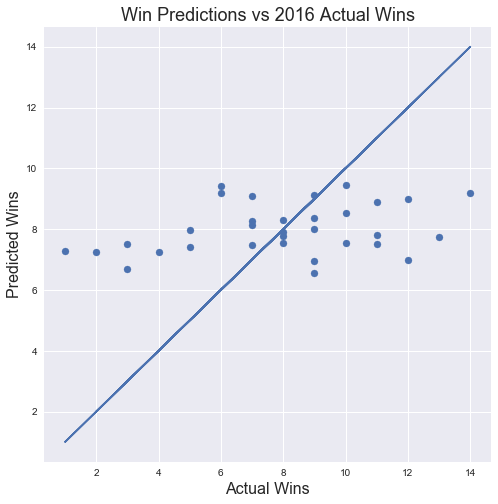

In [173]:
plt.figure(figsize=(8,8))
plt.scatter(ytest,ypred)
plt.plot(ytest,ytest)
plt.title('Win Predictions vs 2016 Actual Wins',fontsize=18)
plt.xlabel('Actual Wins',fontsize=16)
plt.ylabel('Predicted Wins',fontsize=16)

In [ ]:
#build three tear looks 2010-2012

df_2010_2012 = df_new[[i for i in df_new.columns if ('2010' in i) | ('2011' in i)|('2012' in i)]]

df_2010_2012 = df_2010_2012.join(df_new['W_standings_2013'])

df_2010_2012.index = [i + ' (2010-2012)' for i in df_2010_2012.index]

df_2010_2012.columns = df_2010_2012.columns.map(lambda x: x.replace('2010','py_2').replace('2011','py_1').replace('2012','py').replace('2013','next'))

#build three tear looks 2011-2013
df_2011_2013 = df_new[[i for i in df_new.columns if ('2011' in i) | ('2012' in i)|('2013' in i)]]

df_2011_2013 = df_2011_2013.join(df_new['W_standings_2014'])

df_2011_2013.index = [i + ' (2011-2013)' for i in df_2011_2013.index]

df_2011_2013.columns = df_2011_2013.columns.map(lambda x: x.replace('2011','py_2').replace('2012','py_1').replace('2013','py').replace('2014','next'))

#build three year looks 2012-2014
df_2012_2014 = df_new[[i for i in df_new.columns if ('2012' in i) | ('2013' in i)|('2014' in i)]]

df_2012_2014 = df_2012_2014.join(df_new['W_standings_2015'])

df_2012_2014.index = [i + ' (2012-2014)' for i in df_2012_2014.index]

df_2012_2014.columns = df_2012_2014.columns.map(lambda x: x.replace('2012','py_2').replace('2013','py_1').replace('2014','py').replace('2015','next'))

#build three year looks 2013-2015

df_2013_2015 = df_new[[i for i in df_new.columns if ('2013' in i) | ('2014' in i)|('2015' in i)]]

df_2013_2015 = df_2013_2015.join(df_new['W_standings_2016'])

df_2013_2015.index = [i + ' (2013-2015)' for i in df_2013_2015.index]

df_2013_2015.columns = df_2013_2015.columns.map(lambda x: x.replace('2013','py_2').replace('2014','py_1').replace('2015','py').replace('2016','next'))

df_three_year = pd.concat([df_2010_2012,df_2011_2013,df_2012_2014])

print df_three_year.shape
df_three_year.head()